# Mod8 Project 1: CryVesto ForeCast Program #

Step 1: Review the libraries and dependencies that have been imported

In [3]:
#Imports for Analysis and MC Simulation Program:
from pathlib import Path
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import hvplot.pandas
import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
%matplotlib inline
from MCForecastTools import MCSimulation

Step 2: Create an environment file (.env)

Step3: Load the environment variable by calling the load_dotenv() function.
Set the value of the variables alpaca_api_key and alpaca_secret_key equal to their respective environment variables.
Confirm the variables are available by checking the type of each.

In [4]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [5]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key)) 

str

str

Step 4: Set up the Alpaca API REST object. Make sure that this object includes your Alpaca API key, Alpaca secret key, and a reference to the version that you’re using

In [6]:
# Create Alpaca API REST object to call Alpaca's tradeapi.REST function
# Parameters set to alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2") 

### Step 5: 
The major equities markets are the S&P 500, NASADQ 100, Russell 2000, S&P 500 Value Index, and Aggregate Bond Index represented by the following ETFs: SPY, QQQ, VTWO, RPV, BND respectively. Attention to aggressive stock investments represented by ARKK ETF and special alternative investment to cryptocurrency ETF BITO.    
They are selected to emulate key models of benchmark indexes and key asset themes for portfolio allocation and comparison purposes. 

Create the list for the required tickers.  
The values set for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2021-04-01 through 2019-03-31.   
The timeframe value is set to 1 day.   
Create the `etf_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 

In [7]:
# Create the list for the top ETF tickers
etf_tickers = ['SPY', 'QQQ', 'VTWO', 'ARKK', 'RPV', 'BND', 'BITO'] 
etf_tickers

['SPY', 'QQQ', 'VTWO', 'ARKK', 'RPV', 'BND', 'BITO']

In [8]:
# Top Crypto Coin Tickers by mkt-cap (no stable_coins) 
#crypto_tickers = ['BTC', 'ETH', 'XRP', 'LUNA', 'SOL', 'ADA']
# crypto_tickers

Step 5: Utilizing an Alpaca SDK to make an Alpaca API call and get 1 year of daily historical price data from 2021-22 for the following ETFs: SPY, QQQ, VTWO, ARKK, RPV, BND, BITO   
They are selected to emulate key models of benchmark indexes and key asset themes for portfolio allocation and comparison purposes.

In [9]:
# Set the values for 'start_date' and 'end_date' using the 'pd.Timestamp' function
# Inside the function set the date parameter to the prior business day 
# The start and end data is set to 2021-04-01 to 2022-03-31 with tz to "America/New_York", 
# the ISO format is called with the 'isoformat' function 
start_date = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()  
end_date = pd.Timestamp("2022-03-31", tz="America/New_York").isoformat()  

In [10]:
# Set timeframe to one day (1Day)
timeframe="1Day"

In [11]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit of rows & the returned information is set as a DataFrame
limit_rows = 10000

etf_prices_df = alpaca.get_bars(etf_tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame and separate the ticker data
SPY = etf_prices_df[etf_prices_df['symbol']=='SPY'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
QQQ = etf_prices_df[etf_prices_df['symbol']=='QQQ'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'],axis=1)
VTWO = etf_prices_df[etf_prices_df['symbol']=='VTWO'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
ARKK = etf_prices_df[etf_prices_df['symbol']=='ARKK'].drop(['symbol', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1) 
RPV = etf_prices_df[etf_prices_df['symbol']=='RPV'].drop(['symbol','open', 'high', 'low','volume', 'trade_count', 'vwap'], axis=1)
BND = etf_prices_df[etf_prices_df['symbol']=='BND'].drop(['symbol','open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1)
BITO = etf_prices_df[etf_prices_df['symbol']=='BITO'].drop(['symbol','open', 'high', 'low', 'volume', 'trade_count', 'vwap'], axis=1) 

# Concatenate the ticker DataFrames
etf_prices_df = pd.concat([SPY, QQQ, VTWO, ARKK, RPV, BND, BITO], axis=1, keys=["SPY", "QQQ", "VTWO", "ARKK", "RPV", "BND", "BITO"])

# Review the first five rows of the resulting DataFrame 
#display(etf_prices_df.head())
display(etf_prices_df.head())
display(etf_prices_df.tail())

SPY     QQQ    VTWO    ARKK    RPV    BND  BITO
                            close   close   close   close  close  close close
timestamp                                                                    
2021-04-01 04:00:00+00:00  400.61  324.57  180.62  120.85  74.62  84.80   NaN
2021-04-05 04:00:00+00:00  406.36  331.05  181.65  121.64  74.99  84.67   NaN
2021-04-06 04:00:00+00:00  406.12  330.82  180.99  123.83  75.03  84.97   NaN
2021-04-07 04:00:00+00:00  406.59  331.62  178.25  120.82  75.00  84.87   NaN
2021-04-08 04:00:00+00:00  408.52  335.08  179.77  124.14  74.49  85.06   NaN

SPY     QQQ   VTWO   ARKK    RPV    BND   BITO
                            close   close  close  close  close  close  close
timestamp                                                                   
2022-03-25 04:00:00+00:00  452.69  359.35  83.20  64.51  86.99  78.72  27.94
2022-03-28 04:00:00+00:00  455.84  364.91  83.19  67.06  86.41  78.95  30.13
2022-03-29 04:00:00+00:00  461.53  371.19  85.43  71.39  87.10  79.30  29.98
2022-03-30 04:00:00+00:00  458.79  367.09  83.79  68.68  86.90  79.48  29.50
2022-03-31 04:00:00+00:00  452.11  362.54  82.85  66.29  85.65  79.54  28.56

In [12]:
etf_prices_df.columns = etf_prices_df.columns.get_level_values(0)

In [13]:
etf_prices_df

SPY     QQQ    VTWO    ARKK    RPV    BND   BITO
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61  324.57  180.62  120.85  74.62  84.80    NaN
2021-04-05 04:00:00+00:00  406.36  331.05  181.65  121.64  74.99  84.67    NaN
2021-04-06 04:00:00+00:00  406.12  330.82  180.99  123.83  75.03  84.97    NaN
2021-04-07 04:00:00+00:00  406.59  331.62  178.25  120.82  75.00  84.87    NaN
2021-04-08 04:00:00+00:00  408.52  335.08  179.77  124.14  74.49  85.06    NaN
...                           ...     ...     ...     ...    ...    ...    ...
2022-03-25 04:00:00+00:00  452.69  359.35   83.20   64.51  86.99  78.72  27.94
2022-03-28 04:00:00+00:00  455.84  364.91   83.19   67.06  86.41  78.95  30.13
2022-03-29 04:00:00+00:00  461.53  371.19   85.43   71.39  87.10  79.30  29.98
2022-03-30 04:00:00+00:00  458.79  367.09   83.79   68.68  86.90  79.48  29.50
2022-03-31 04:00:00+00:00  452.11  362.54   82.85   66.29  85.65  79.54  28.56

[253 rows x 7 columns]

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, portfolio diversification and prognostications through the MCSimulator. We analyze each component with weightings in the portfolio one at a time to compare asset class influence on returns.

###  Analyze the Performance

Analyze the data to determine if any of the ETFs outperform the broader stock market, which the S&P 500 ETF represents.

#### Step : Utilize the Pandas `cumprod` function to calculate the cumulative returns for the ETFs. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [10]:
#Calc a cumulative returns df to compare asset class performance
etf_index_daily_rtns = etf_prices_df.pct_change().dropna() 
etf_index_cumltv_rtns = (1 + etf_index_daily_rtns).cumprod()

#display(etf_index_cumltv_rtns.head())
display(etf_index_cumltv_rtns.tail()) 

SPY       QQQ      VTWO      ARKK       RPV  \
                              close     close     close     close     close   
timestamp                                                                     
2022-03-25 04:00:00+00:00  1.004549  0.957067  0.911581  0.539381  1.092702   
2022-03-28 04:00:00+00:00  1.011539  0.971875  0.911471  0.560702  1.085416   
2022-03-29 04:00:00+00:00  1.024166  0.988601  0.936014  0.596906  1.094084   
2022-03-30 04:00:00+00:00  1.018085  0.977681  0.918045  0.574247  1.091571   
2022-03-31 04:00:00+00:00  1.003262  0.965563  0.907746  0.554264  1.075870   

                                BND      BITO  
                              close     close  
timestamp                                      
2022-03-25 04:00:00+00:00  0.926227  0.666190  
2022-03-28 04:00:00+00:00  0.928933  0.718407  
2022-03-29 04:00:00+00:00  0.933051  0.714831  
2022-03-30 04:00:00+00:00  0.935169  0.703386  
2022-03-31 04:00:00+00:00  0.935875  0.680973

###3 Step 4: Utilize the `describe` function to generate the summary statistics for the ETFs. These statistics help determine the spread (or difference) between the ETFs cumulative averages between each asset class in a weighted portfolio. This spread quantifies a way to compare expected possible results of investing in each asset class after running the MCSimulator. 

In [11]:
# Use the describe function to generate summary statistics for the ETF DataFrame
etf_index_cumltv_rtns.describe()

SPY         QQQ        VTWO        ARKK         RPV         BND  \
            close       close       close       close       close       close   
count  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000   
mean     1.007161    0.990232    0.947713    0.732390    1.028981    0.979545   
std      0.034318    0.062574    0.062633    0.179127    0.031134    0.024430   
min      0.923686    0.847391    0.845952    0.437207    0.946740    0.926227   
25%      0.984822    0.936959    0.891859    0.574247    1.011682    0.958701   
50%      1.011805    1.006552    0.946971    0.707692    1.024746    0.984351   
75%      1.036903    1.048632    0.991892    0.883696    1.051124    1.002000   
max      1.060070    1.075958    1.073847    1.046154    1.094084    1.010589   

             BITO  
            close  
count  113.000000  
mean     0.727565  
std      0.141815  
min      0.531950  
25%      0.626609  
50%      0.680973  
75%      0.860277  
max      1.032904

### Analyze the Volatility
When analyzing assets or securities for investments investors usually look at relative risk as one of the first measures in their decision process. Using a 1 year history of the the above summary statistics we focus on standard deviations (std or std dev) to compare volatility or the movement of the price of the asset or index from its expected value. In the chart below, if an ETF has multiple large increases and decreases in its closing price over a short time period, we consider it volatile. (We consider increases and decreases large if they’re +/− 3.0% when the average return is +0.25%.)
Analyze the volatility of each of the 7 ETFs and of the S&P 500 Index using box plots.

<AxesSubplot:title={'center':'Volatility of the ETF Indexes & Asset Classes'}>

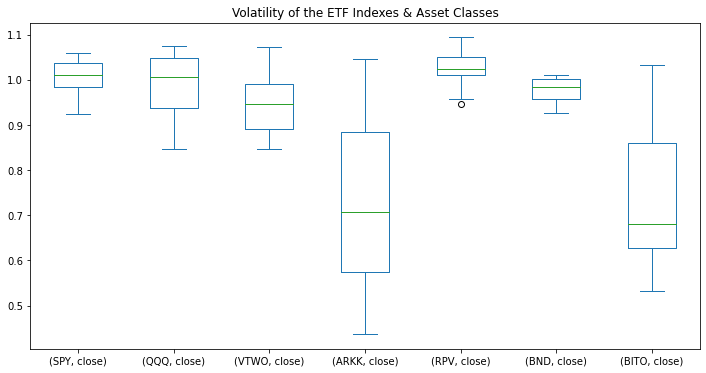

In [12]:
# Utilize the cumulative daily return data to create box plots to visualize the volatility of 7 ETFs including the S&P 500 

etf_index_cumltv_rtns.plot.box(figsize=(12,6), xlabel='ETF Indexes', title="Volatility of the ETF Indexes & Asset Classes")

#### Observing the box plots it appears that ARKK a new technology oriented ETF is the most volatile, while BITO a bitcoin proxy ETF is placed as the runner up with its mean positioned in the lower quarter of the box plot making it biased on the low end. Also its slightly tighter box size indicates that the underlying cryptocurrency bitcoin is not any riskier than Aggressive Growth stocks proxy ARKK with less downside at this moment in time.  

In [13]:
etf_bal_prices = etf_prices_df.drop(columns=[('ARKK', 'close'), ( 'BITO', 'close')])
etf_bal_prices

SPY     QQQ    VTWO    RPV    BND
                            close   close   close  close  close
timestamp                                                      
2021-04-01 04:00:00+00:00  400.61  324.57  180.62  74.62  84.80
2021-04-05 04:00:00+00:00  406.36  331.05  181.65  74.99  84.67
2021-04-06 04:00:00+00:00  406.12  330.82  180.99  75.03  84.97
2021-04-07 04:00:00+00:00  406.59  331.62  178.25  75.00  84.87
2021-04-08 04:00:00+00:00  408.52  335.08  179.77  74.49  85.06
...                           ...     ...     ...    ...    ...
2022-03-25 04:00:00+00:00  452.69  359.35   83.20  86.99  78.72
2022-03-28 04:00:00+00:00  455.84  364.91   83.19  86.41  78.95
2022-03-29 04:00:00+00:00  461.53  371.19   85.43  87.10  79.30
2022-03-30 04:00:00+00:00  458.79  367.09   83.79  86.90  79.48
2022-03-31 04:00:00+00:00  452.11  362.54   82.85  85.65  79.54

[253 rows x 5 columns]

### The MCSimulation: 
### Utilize the MCSimulation functions to run a simulation of possible outcomes for an initial investment. It visualizes the simulation results by using both an overlay line plot and a histogram. It also, generates summary statistics to determine possible results of an investment over a given time period.

### Step 1: 
Create the 1st MCSimulation with index ETFs whose parameters are set with equal `weightings` in a portfolio. The parameter `weights` are set to `[.20, .20, .20, .20, .20]` to represent a portfolio of S&P 500 Index stks, NASDAQ 100, Russell 2000 Small Caps, S&P 500 Value, and the Bloomberg Aggregate Bond Index. 

Create an instance of MCSimulation with the following parameters that simulates the next 1 year of portfolio returns:
weights: Set this parameter to [.20,.20,.20,.20,.20] to evenly invest for major index and asset class ETFs.
num_simulation: Set this parameter to 500 to ensure the reliability of the simulation. 
num_trading_days: Set this parameter to 252 trade days x 1 to simulate 1 year of trading days.

In [14]:
# Configure a Monte Carlo simulation to forecast 1 years cumulative returns
# Use an even weight of .20 across all 5 stocks
MC_even_weight = MCSimulation(
    portfolio_data = etf_bal_prices,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_even_weight.portfolio_data.head() 

SPY                  QQQ                 VTWO  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61          NaN  324.57          NaN  180.62   
2021-04-05 04:00:00+00:00  406.36     0.014353  331.05     0.019965  181.65   
2021-04-06 04:00:00+00:00  406.12    -0.000591  330.82    -0.000695  180.99   
2021-04-07 04:00:00+00:00  406.59     0.001157  331.62     0.002418  178.25   
2021-04-08 04:00:00+00:00  408.52     0.004747  335.08     0.010434  179.77   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2021-04-01 04:00:00+00:00          NaN  74.62          NaN  84.80          NaN  
2021-04-05 04:00:00+00:00     0.005703  74.99     0.004958  84.67    -0.001533  
2021-04-06 04:00:00+00:00    -0.003633  75.03     0.000533  84.97     0.003543  
2021-04-07 04:00:00+00:00    -0.015139  75.00    -0.000400  84.87    -0.001177  
2021-04-08 04:00:00+00:00     0.008527  74.49    -0.006800  85.06     0.002239

In [15]:
# Run a Monte Carlo simulation to forecast five years cumulative returns of an balanced weight portfolio
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.008147  1.006875  1.006315  1.007061  0.999767  0.997675  0.995672   
2    0.996098  0.995756  1.001711  1.018501  1.011640  0.987069  1.008671   
3    0.990976  0.991282  1.013515  1.009588  1.012437  0.974968  0.998485   
4    0.987067  0.994442  1.028563  1.001989  1.005298  0.970734  0.993625   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.093249  0.982466  0.935084  0.916753  0.892085  0.920989  0.860065   
249  1.112516  0.989154  0.934124  0.921228  0.892005  0.913146  0.863276   
250  1.124695  0.979893  0.931977  0.928126  0.883646  0.914417  0.861257   
251  1.132029  0.984837  0.930707  0.933565  0.880648  0.915312  0.864595   
252  1.139680  0.992169  0.924023  0.937604  0.893097  0.918591  0.867550   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.006867  0.991488  1.000259  ...  0.990882  0.988303  0.994127   
2    1.003065  0.989679  0.997511  ...  0.992398  0.978586  0.992842   
3    0.990697  0.993718  0.981943  ...  0.993656  0.982710  0.996306   
4    0.985641  1.002200  0.987416  ...  0.995511  0.988646  0.989992   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.079233  1.079970  0.836282  ...  1.090935  0.975325  0.974902   
249  1.080797  1.066619  0.838965  ...  1.094318  0.982421  0.963826   
250  1.076485  1.055503  0.836366  ...  1.088599  1.008366  0.962227   
251  1.061916  1.068271  0.846168  ...  1.098042  1.017560  0.973936   
252  1.070838  1.061099  0.837724  ...  1.088301  1.019289  0.976587   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.995925  1.002450  0.998070  0.988250  0.988635  0.999360  0.997935  
2    0.975954  0.993451  0.995703  0.996505  0.989117  0.999570  1.012837  
3    0.977878  0.988184  0.992224  0.994917  0.995671  0.999534  1.017272  
4    0.975234  0.990013  0.990967  0.999455  0.993786  0.998766  1.018547  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.816331  1.001187  1.144406  0.858500  0.719632  1.092339  0.746215  
249  0.822216  1.000828  1.145896  0.867810  0.713839  1.087658  0.750917  
250  0.826728  1.002938  1.149806  0.871051  0.715206  1.072948  0.755483  
251  0.828260  1.002731  1.143204  0.872977  0.712300  1.071358  0.758997  
252  0.821374  0.994709  1.141563  0.871947  0.720785  1.077987  0.755371  

[253 rows x 1000 columns]

C:\Users\gotha\AppData\Local\Temp/ipykernel_2732/3017922680.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  even_weight_line_plot.get_figure().savefig("MC_1Year_sim_plot.png", box_inches="tight")


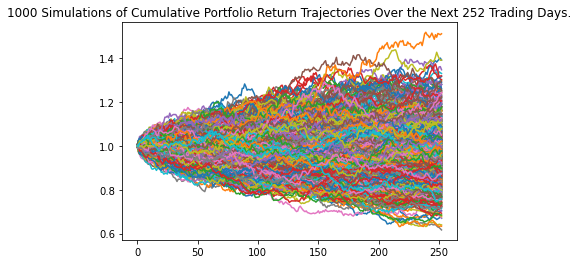

In [16]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
even_weight_line_plot = MC_even_weight.plot_simulation() 

# Save the plot for future use
even_weight_line_plot.get_figure().savefig("MC_1Year_sim_plot.png", box_inches="tight") 

In [17]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
#whales_spx_cumltv_rtns.plot(figsize = (16,8), title = "Whales and S&P 500 Cumulative Returns Autumn 2014-2020") 

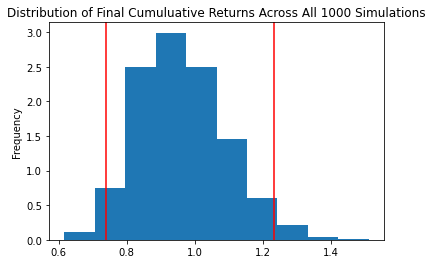

In [18]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_even_weight.plot_distribution() 

# Save the plot for future use
even_weight_distribution_plot.get_figure().savefig('MC_1year_dist_plot.png',bbox_inches='tight') 

In [19]:
# Visualize the Monte Carlo simulation by creating a box chart
#even_weight_distribution_plot = MC_even_weight.plot_distribution(kind='box', figsize=(14,7), title="Box Plot of ETFs vs S&P 500") 

# Save the plot for future use
#even_weight_distribution_plot.get_figure().savefig('MC_2year_dist_plot.png',bbox_inches='tight') 


In [20]:
# Generate the summary statistics for the Monte Carlo simulation
# Save the summary statistics information in a variable called even_weights_table 
even_weight_table = MC_even_weight.summarize_cumulative_return()

# Print the table of summary statistics
print(even_weight_table)  

count           1000.000000
mean               0.961287
std                0.128033
min                0.616489
25%                0.867283
50%                0.950659
75%                1.048184
max                1.511741
95% CI Lower       0.739768
95% CI Upper       1.233445
Name: 252, dtype: float64


Step 8: Using a 95% confidence interval and your intial investment

In [21]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the even_weight_table)
# calculate  the range of the possible outcomes for a $10,000 investment 
even_ci_lower = round(even_weight_table[8]*10000,2)
even_ci_upper = round(even_weight_table[9]*10000,2) 

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" with an even weight portfolio over the next 1 year will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio with an even weight portfolio over the next 1 years will end within in the range of $7397.68 and $12334.45.


### Step 2: Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.80, .05, .05, .05, .05]` to represent a portfolio of S&P 500 stks.

In [22]:
MC_spx = MCSimulation(
    portfolio_data = etf_bal_prices,
    weights = [.80, .05, .05, .05, .05],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_spx.portfolio_data.head()  

SPY                  QQQ                 VTWO  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61          NaN  324.57          NaN  180.62   
2021-04-05 04:00:00+00:00  406.36     0.014353  331.05     0.019965  181.65   
2021-04-06 04:00:00+00:00  406.12    -0.000591  330.82    -0.000695  180.99   
2021-04-07 04:00:00+00:00  406.59     0.001157  331.62     0.002418  178.25   
2021-04-08 04:00:00+00:00  408.52     0.004747  335.08     0.010434  179.77   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2021-04-01 04:00:00+00:00          NaN  74.62          NaN  84.80          NaN  
2021-04-05 04:00:00+00:00     0.005703  74.99     0.004958  84.67    -0.001533  
2021-04-06 04:00:00+00:00    -0.003633  75.03     0.000533  84.97     0.003543  
2021-04-07 04:00:00+00:00    -0.015139  75.00    -0.000400  84.87    -0.001177  
2021-04-08 04:00:00+00:00     0.008527  74.49    -0.006800  85.06     0.002239

### Step 10: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 10,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after 3years of growth.

In [23]:
# This MCSimulator forecasts 1 year of cumulative returns with 80% SPX etf
MC_spx.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.999375  1.014031  0.980100  1.006335  0.999249  0.998814  0.995422   
2    0.994738  1.016511  0.982350  1.013629  1.000587  0.990297  0.998089   
3    0.986829  1.012651  0.991982  1.008831  1.001743  1.001382  1.005590   
4    0.982507  1.008203  0.980062  1.010708  1.000978  1.012813  0.996102   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.963272  1.072321  1.138711  0.969717  1.119268  0.983821  1.011343   
249  0.954406  1.061116  1.141483  0.963526  1.124803  0.974349  1.011615   
250  0.949076  1.045522  1.120261  0.959362  1.126619  0.970361  1.013216   
251  0.954841  1.047441  1.108047  0.955962  1.140682  0.979228  1.022320   
252  0.955556  1.039830  1.112193  0.958575  1.134645  0.984261  1.022055   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.996005  0.996768  1.014432  ...  1.010586  1.012838  1.002667   
2    1.011177  1.007598  1.006302  ...  1.031373  1.009060  0.993229   
3    1.011138  1.008078  1.000880  ...  1.040044  1.010412  1.009243   
4    1.017954  1.005856  1.003136  ...  1.036024  1.010809  1.000740   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.915727  1.081940  1.188037  ...  1.046389  0.912145  1.103323   
249  0.910004  1.091439  1.183063  ...  1.041730  0.895172  1.093625   
250  0.909432  1.099975  1.178465  ...  1.044581  0.890949  1.090347   
251  0.907297  1.112553  1.172867  ...  1.043956  0.892375  1.096701   
252  0.902817  1.103695  1.176771  ...  1.039895  0.881952  1.095217   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.989014  0.999760  0.993153  0.997253  1.002854  1.007224  1.000664  
2    0.993224  1.019965  0.986574  1.005796  0.998742  1.006722  0.993804  
3    0.992717  1.024567  0.994139  0.994531  0.987415  1.020843  0.992983  
4    0.981605  1.024572  0.991620  0.995412  0.988557  1.019129  1.005259  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.936770  1.052624  1.111030  1.172366  0.946339  1.191455  1.153175  
249  0.932509  1.053965  1.108690  1.175997  0.936384  1.181774  1.165775  
250  0.914382  1.058775  1.100730  1.188870  0.932647  1.180578  1.168042  
251  0.913249  1.062465  1.090539  1.186276  0.931307  1.178463  1.160474  
252  0.905152  1.066174  1.084322  1.199830  0.939333  1.181371  1.159287  

[253 rows x 1000 columns]

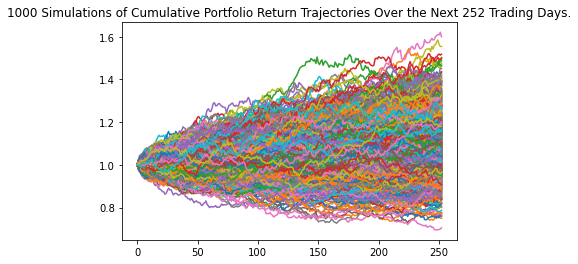

In [24]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
spx_wght_line_plot = MC_spx.plot_simulation() 

# Save the plot for future use
spx_wght_line_plot.get_figure().savefig("MC_1Yr_SPX_sim_plot.png", bbox_inches="tight") 

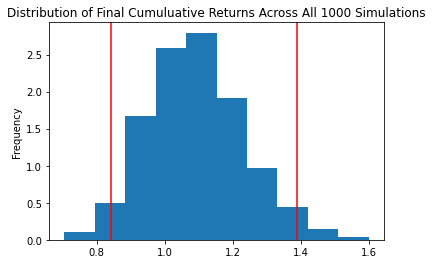

In [25]:
# Visualize the MC simulation for a majority weight in SPX by creating a histogram
MC_spx_dist_plot = MC_spx.plot_distribution()

In [26]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in AT&T
# Save the summary statistics information in a variable called att_table 
spx_table = MC_spx.summarize_cumulative_return()

# Print summary statistics
print(spx_table)

count           1000.000000
mean               1.091793
std                0.140381
min                0.705164
25%                0.990746
50%                1.086276
75%                1.176792
max                1.599761
95% CI Lower       0.841622
95% CI Upper       1.390006
Name: 252, dtype: float64


In [27]:
# calculate  the range of the possible outcomes for a $10,000 investment 
spx_ci_lower =round(spx_table[8]*10000,2)
spx_ci_upper = round(spx_table[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" with a 80% weight in SPX over the next 1 years will end within in the range of"
      f" ${spx_ci_lower} and ${spx_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio with a 80% weight in SPX over the next 1 years will end within in the range of $8416.22 and $13900.06.


### Step 3: Create a 3rd instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .80., 05, .05, .05]` to represent a portfolio of NASDAQ 100 Index ETF (QQQ) stks.

In [28]:
MC_qqq = MCSimulation(
    portfolio_data = etf_bal_prices,
    weights = [.05, .80, .05, .05, .05],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_qqq.portfolio_data.head()  

SPY                  QQQ                 VTWO  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61          NaN  324.57          NaN  180.62   
2021-04-05 04:00:00+00:00  406.36     0.014353  331.05     0.019965  181.65   
2021-04-06 04:00:00+00:00  406.12    -0.000591  330.82    -0.000695  180.99   
2021-04-07 04:00:00+00:00  406.59     0.001157  331.62     0.002418  178.25   
2021-04-08 04:00:00+00:00  408.52     0.004747  335.08     0.010434  179.77   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2021-04-01 04:00:00+00:00          NaN  74.62          NaN  84.80          NaN  
2021-04-05 04:00:00+00:00     0.005703  74.99     0.004958  84.67    -0.001533  
2021-04-06 04:00:00+00:00    -0.003633  75.03     0.000533  84.97     0.003543  
2021-04-07 04:00:00+00:00    -0.015139  75.00    -0.000400  84.87    -0.001177  
2021-04-08 04:00:00+00:00     0.008527  74.49    -0.006800  85.06     0.002239

In [29]:
# This MCSimulator forecasts 1 years of cumulative returns with 80% QQQ etf
MC_qqq.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.993440  0.990040  0.988593  1.009837  0.982120  0.998841  1.017020   
2    0.996199  0.980297  0.996394  1.000910  0.986527  0.983595  1.036961   
3    1.004763  0.971849  1.007109  1.021584  0.988098  1.004914  1.042985   
4    1.005059  0.986872  1.005892  1.016425  0.982413  1.004364  1.043724   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.886120  1.034504  1.226604  1.328773  1.110021  1.272793  1.137244   
249  0.881931  1.037483  1.227757  1.326036  1.074692  1.251286  1.136188   
250  0.889735  1.031689  1.234240  1.334757  1.063772  1.240377  1.150699   
251  0.881094  1.034493  1.233401  1.361707  1.060307  1.244870  1.165968   
252  0.870568  1.049597  1.256461  1.367111  1.060384  1.235062  1.164671   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.019765  0.996456  1.007804  ...  1.007939  0.992053  1.011395   
2    1.019197  1.003649  1.009716  ...  1.025497  0.980712  1.014990   
3    1.011670  1.007667  1.009711  ...  1.026625  0.986778  1.006679   
4    1.013647  1.006757  1.011157  ...  1.023225  1.013863  1.005036   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.876299  0.909150  0.960826  ...  1.284966  1.023896  1.072158   
249  0.879407  0.917763  0.975362  ...  1.277596  1.024642  1.086257   
250  0.884205  0.907850  0.963376  ...  1.248927  1.005575  1.071965   
251  0.893631  0.906755  0.963804  ...  1.251823  1.002984  1.083256   
252  0.900632  0.910299  0.951592  ...  1.270589  1.009062  1.094835   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.991343  1.020615  0.989584  1.015726  1.009309  0.982539  1.008065  
2    0.994414  1.028524  0.994449  1.023674  0.998914  1.002077  1.007971  
3    1.007276  1.019151  0.993514  1.045683  1.013562  0.991754  1.014730  
4    0.980215  1.001228  1.012152  1.053402  1.016166  0.978198  1.015895  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.567744  1.051574  1.247233  1.292092  1.176487  1.082867  1.308021  
249  1.561357  1.039433  1.258572  1.272955  1.167495  1.096939  1.328278  
250  1.532384  1.038265  1.248249  1.279266  1.162476  1.101666  1.328539  
251  1.555159  1.032499  1.259940  1.278325  1.169754  1.104791  1.348661  
252  1.572897  1.017119  1.270057  1.268303  1.158270  1.117959  1.356492  

[253 rows x 1000 columns]

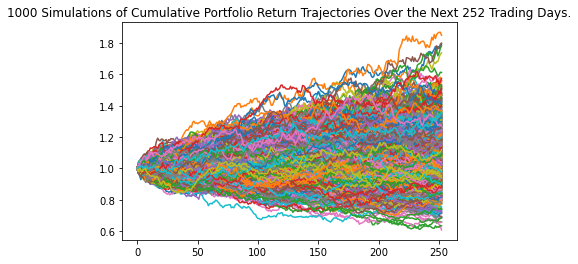

In [30]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
qqq_wght_line_plot = MC_qqq.plot_simulation() 

# Save the plot for future use
qqq_wght_line_plot.get_figure().savefig("MC_1Yr_QQQ_sim_plot.png", bbox_inches="tight") 

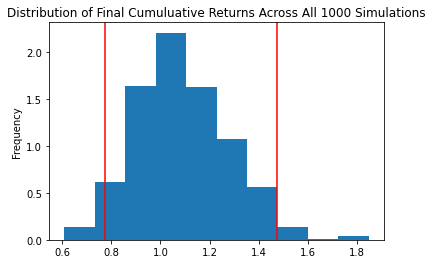

In [31]:
# Visualize the MC simulation for a majority weight in SPX by creating a histogram
MC_QQQ_dist_plot = MC_qqq.plot_distribution()

In [32]:
# Generate the summary statistics for the MC simulation with majority weight in QQQ
# Save the summary statistics information in a variable called att_table 
qqq_table = MC_qqq.summarize_cumulative_return()

# Print summary statistics
print(qqq_table)

count           1000.000000
mean               1.090127
std                0.188050
min                0.608090
25%                0.957808
50%                1.075674
75%                1.213230
max                1.849082
95% CI Lower       0.774844
95% CI Upper       1.475705
Name: 252, dtype: float64


In [33]:
# calculate  the range of the possible outcomes for a $10,000 investment 
qqq_ci_lower =round(qqq_table[8]*10000,2)
qqq_ci_upper = round(qqq_table[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" with a 80% weight in QQQ over the next 1 years will end within in the range of"
      f" ${qqq_ci_lower} and ${qqq_ci_upper}.")
      

There is a 95% chance that an initial investment of $10,000 in the portfolio with a 80% weight in QQQ over the next 1 years will end within in the range of $7748.44 and $14757.05.


### Create a 4th instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .05, .80, .05, .05]` to represent a portfolio of Russell 2000 stks.

### Step 4: Run the Monte Carlo simulation with the Vanguard Russell 2000(VTWO) ETF weight. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 10,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after 3years of growth.

In [34]:
# According to the documentation, the MCSimulation module requires us to supply the following parameters to properly configure
# the Monte Carlo simulation:
# Configure a Monte Carlo simulation to forecast 3 years cumulative returns
MC_vtwo = MCSimulation(
    portfolio_data = etf_bal_prices,
    weights = [.05, .05, .80, .05, .05],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_vtwo.portfolio_data.head()  

SPY                  QQQ                 VTWO  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61          NaN  324.57          NaN  180.62   
2021-04-05 04:00:00+00:00  406.36     0.014353  331.05     0.019965  181.65   
2021-04-06 04:00:00+00:00  406.12    -0.000591  330.82    -0.000695  180.99   
2021-04-07 04:00:00+00:00  406.59     0.001157  331.62     0.002418  178.25   
2021-04-08 04:00:00+00:00  408.52     0.004747  335.08     0.010434  179.77   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2021-04-01 04:00:00+00:00          NaN  74.62          NaN  84.80          NaN  
2021-04-05 04:00:00+00:00     0.005703  74.99     0.004958  84.67    -0.001533  
2021-04-06 04:00:00+00:00    -0.003633  75.03     0.000533  84.97     0.003543  
2021-04-07 04:00:00+00:00    -0.015139  75.00    -0.000400  84.87    -0.001177  
2021-04-08 04:00:00+00:00     0.008527  74.49    -0.006800  85.06     0.002239

In [35]:
# This MCSimulation forecasts 1 years of cumulative returns with 80% BND etf
MC_vtwo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.991616  0.977977  0.982163  0.980664  0.972295  1.045308  0.964264   
2    0.970356  0.997373  1.008151  0.970988  0.973111  1.061420  0.910743   
3    0.943978  1.031990  1.028551  0.971463  1.017367  1.112413  0.943395   
4    0.950732  0.999045  1.017792  0.947865  0.966262  1.069430  0.922587   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.273312  0.896755  0.958952  0.314269  0.761412  0.576441  0.378957   
249  0.270426  0.882322  0.956704  0.308800  0.780084  0.575350  0.374305   
250  0.273493  0.894601  0.921316  0.311036  0.782872  0.589008  0.359357   
251  0.266443  0.890802  0.911655  0.305038  0.716817  0.571611  0.384399   
252  0.270687  0.865294  0.881154  0.309075  0.711779  0.559348  0.386172   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.041656  1.024167  0.965142  ...  1.003424  0.919776  0.977813   
2    1.022448  1.004417  0.988384  ...  0.961548  0.918564  0.966086   
3    1.045391  0.999626  0.987065  ...  0.981196  0.924534  0.961094   
4    1.091242  0.944842  1.043798  ...  0.997910  0.905630  0.943426   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.345137  0.253719  0.785705  ...  0.255332  0.861455  1.293407   
249  1.336735  0.247544  0.842083  ...  0.251455  0.854947  1.282511   
250  1.327430  0.248961  0.861227  ...  0.245789  0.883391  1.274591   
251  1.311482  0.246257  0.831622  ...  0.240142  0.845213  1.235535   
252  1.336300  0.246937  0.833850  ...  0.253475  0.825465  1.211467   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.964734  0.996927  1.005291  0.969518  1.026256  0.995029  1.035972  
2    0.931349  0.934507  0.986939  0.984188  1.025571  0.996886  0.987572  
3    0.929961  0.935950  0.928133  0.953931  1.052509  0.993038  1.025296  
4    0.904495  0.943230  0.912543  0.917555  1.031646  0.982317  0.988896  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.086492  0.488749  1.126877  0.541514  2.070307  0.726981  0.376182  
249  1.024987  0.472067  1.113276  0.547830  1.986712  0.728576  0.352056  
250  1.078549  0.454423  1.089991  0.531483  2.031035  0.715202  0.349206  
251  1.102885  0.440770  1.075387  0.547894  1.995142  0.719875  0.344614  
252  1.082688  0.451907  1.123121  0.551219  1.983581  0.739996  0.335296  

[253 rows x 1000 columns]

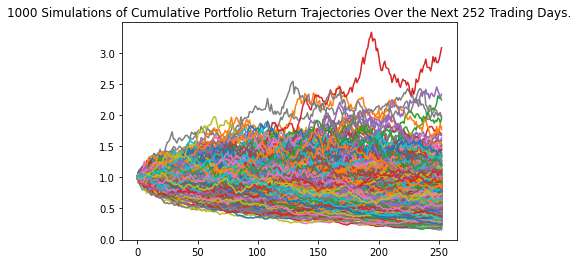

In [36]:
# Visualize the MCSimulation by creating an overlay line plot of VTWO etf
vtwo_wght_line_plot = MC_vtwo.plot_simulation() 

# Save the plot for future use
vtwo_wght_line_plot.get_figure().savefig("MC_1Yr_VTWO_sim_plot.png", bbox_inches="tight") 

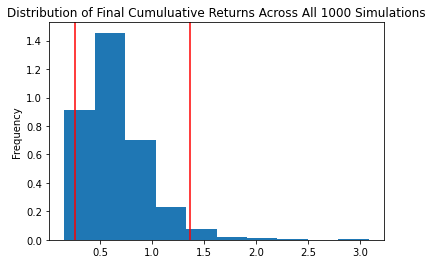

In [37]:
# Visualize the MC simulation for a majority weight in SPX by creating a histogram
MC_vtwo_dist_plot = MC_vtwo.plot_distribution()

In [38]:
# Generate the summary statistics for the MC simulation with majority weight in QQQ
# Save the summary statistics information in a variable called att_table 
vtwo_table = MC_vtwo.summarize_cumulative_return()

# Print summary statistics
print(vtwo_table)

count           1000.000000
mean               0.656436
std                0.304868
min                0.155508
25%                0.440372
50%                0.598995
75%                0.800133
max                3.082017
95% CI Lower       0.253442
95% CI Upper       1.362002
Name: 252, dtype: float64


In [39]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
vtwo_ci_95_lower_cumulative_return = round(vtwo_table[8] * 10000,2)
vtwo_ci_95_upper_cumulative_return = round(vtwo_table[9] * 10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the VTWO portfolio"
    f" over the next 1 year will end within in the range of"
    f" ${vtwo_ci_95_lower_cumulative_return: .2f} and ${vtwo_ci_95_upper_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $10,000 in the VTWO portfolio over the next 1 year will end within in the range of $ 2534.42 and $ 13620.02.


### Step 5: Create a 5th instance of MCSimulation with the same parameters, but set the `[weights]` parameter to `[.05, .05, 05, .80, .05]` to represent a portfolio of S&P 500 Value Index stks(RPV)ETF .¶

In [40]:
# The MCSimulation module requires the following parameters to properly configure
# Configure a MCSimulation to forecast 1 year of cumulative returns heavily weighted to RPV etf
MC_rpv = MCSimulation(
    portfolio_data = etf_bal_prices,
    weights = [.05, .05, .05, .80, .05],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_rpv.portfolio_data.head()  

SPY                  QQQ                 VTWO  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61          NaN  324.57          NaN  180.62   
2021-04-05 04:00:00+00:00  406.36     0.014353  331.05     0.019965  181.65   
2021-04-06 04:00:00+00:00  406.12    -0.000591  330.82    -0.000695  180.99   
2021-04-07 04:00:00+00:00  406.59     0.001157  331.62     0.002418  178.25   
2021-04-08 04:00:00+00:00  408.52     0.004747  335.08     0.010434  179.77   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2021-04-01 04:00:00+00:00          NaN  74.62          NaN  84.80          NaN  
2021-04-05 04:00:00+00:00     0.005703  74.99     0.004958  84.67    -0.001533  
2021-04-06 04:00:00+00:00    -0.003633  75.03     0.000533  84.97     0.003543  
2021-04-07 04:00:00+00:00    -0.015139  75.00    -0.000400  84.87    -0.001177  
2021-04-08 04:00:00+00:00     0.008527  74.49    -0.006800  85.06     0.002239

In [41]:
# This MCSimulation forecasts 1 years of cumulative returns with 80% RPV etf
MC_rpv.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.002074  1.004597  1.009123  0.999945  0.993540  1.011689  0.989322   
2    0.985194  1.010528  1.001735  1.019012  0.991664  1.029695  0.971332   
3    0.988074  1.020614  0.996182  1.013070  1.007669  1.029850  0.973591   
4    0.991247  1.034109  0.993760  1.000769  1.010157  1.037391  0.971634   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.095780  1.372746  1.122241  1.279650  0.873427  0.991776  1.198269   
249  1.106303  1.370042  1.115833  1.280050  0.877646  0.999245  1.200684   
250  1.091082  1.379449  1.109832  1.280751  0.875952  0.997919  1.199258   
251  1.080199  1.380567  1.108450  1.278378  0.885690  1.018784  1.194566   
252  1.077709  1.390858  1.117226  1.279198  0.896221  1.026609  1.187934   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.997694  1.003207  0.998745  ...  1.008985  1.015253  1.003672   
2    0.989193  0.986591  0.992894  ...  1.008692  1.009702  1.001343   
3    0.993671  0.987482  1.007853  ...  1.007874  1.008598  1.002901   
4    0.996116  0.978134  1.025311  ...  1.022002  1.022370  0.994257   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.073247  1.187316  0.989409  ...  1.212137  1.148553  1.155972   
249  1.090531  1.191024  0.991719  ...  1.214995  1.151602  1.159260   
250  1.082290  1.200534  0.988576  ...  1.190817  1.144660  1.154692   
251  1.089863  1.209557  0.990389  ...  1.196862  1.146380  1.146047   
252  1.098555  1.213599  0.992666  ...  1.204426  1.155189  1.160075   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.003661  1.001667  1.002694  0.995577  1.007842  0.986862  0.995767  
2    0.998262  1.010296  0.996945  0.988262  1.014108  1.009830  1.003497  
3    0.995435  1.019190  0.995127  0.985588  1.024337  1.016355  1.001802  
4    1.003868  0.994954  1.005364  0.978544  1.030807  1.016265  1.008499  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.050499  1.071898  1.004473  1.020318  0.973034  1.081508  1.329818  
249  1.055476  1.069722  0.996371  1.021259  0.996742  1.074610  1.328053  
250  1.030726  1.054495  1.002548  1.044812  0.983742  1.076556  1.340382  
251  1.039655  1.047688  0.989504  1.045613  0.986653  1.087025  1.328911  
252  1.031283  1.059043  1.000249  1.037839  0.973834  1.076369  1.335025  

[253 rows x 1000 columns]

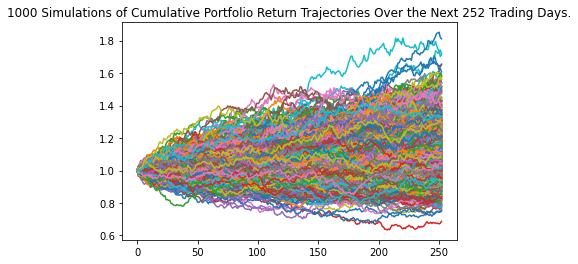

In [42]:
# Plot simulation outcomes of RPV ETF
rpv_wght_line_plot = MC_rpv.plot_simulation()

# Save the plot for future use
rpv_wght_line_plot.get_figure().savefig("MC_1Yr_RPV_sim_plot.png", bbox_inches="tight")

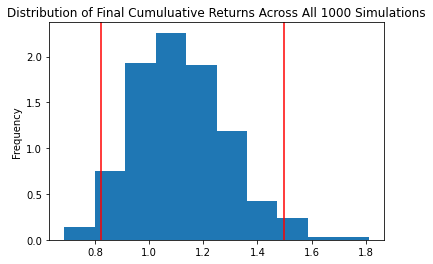

In [43]:
# Visualize the MC simulation for a majority weight in RPV ETF by creating a histogram
MC_rpv_dist_plot = MC_rpv.plot_distribution()

In [44]:
# Generate the summary statistics for the MCSimulation with majority weight in RPV ETF
# Save the summary statistics information in a variable called rpv_table 
rpv_table = MC_rpv.summarize_cumulative_return()

# Print summary statistics
print(rpv_table)

count           1000.000000
mean               1.118388
std                0.171911
min                0.687156
25%                0.995364
50%                1.104946
75%                1.224562
max                1.810846
95% CI Lower       0.822876
95% CI Upper       1.497499
Name: 252, dtype: float64


In [45]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
rpv_ci_95_lower = round(rpv_table[8] * 10000,2)
rpv_ci_95_upper = round(rpv_table[9] * 10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the ARKK portfolio"
    f" over the next 1 year will end within in the range of"
    f" ${rpv_ci_95_lower: .2f} and ${rpv_ci_95_upper: .2f}.")

There is a 95% chance that an initial investment of $10,000 in the ARKK portfolio over the next 1 year will end within in the range of $ 8228.76 and $ 14974.99.


### Step 5: Create a 5th instance of MCSimulation with the same parameters, but set the `[weights]` parameter to `[.05, .05, 05, .05, .80]` to represent a portfolio tracking the entire investment grade bond market with the Bloomberg US Aggregate Index (BND)ETF .¶

In [46]:
# Configure a Monte Carlo simulation to forecast 1 year cumulative returns
MC_bnd = MCSimulation(
    portfolio_data = etf_bal_prices,
    weights = [.05, .05, .05, .05, .80],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_bnd.portfolio_data.head()  

SPY                  QQQ                 VTWO  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61          NaN  324.57          NaN  180.62   
2021-04-05 04:00:00+00:00  406.36     0.014353  331.05     0.019965  181.65   
2021-04-06 04:00:00+00:00  406.12    -0.000591  330.82    -0.000695  180.99   
2021-04-07 04:00:00+00:00  406.59     0.001157  331.62     0.002418  178.25   
2021-04-08 04:00:00+00:00  408.52     0.004747  335.08     0.010434  179.77   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2021-04-01 04:00:00+00:00          NaN  74.62          NaN  84.80          NaN  
2021-04-05 04:00:00+00:00     0.005703  74.99     0.004958  84.67    -0.001533  
2021-04-06 04:00:00+00:00    -0.003633  75.03     0.000533  84.97     0.003543  
2021-04-07 04:00:00+00:00    -0.015139  75.00    -0.000400  84.87    -0.001177  
2021-04-08 04:00:00+00:00     0.008527  74.49    -0.006800  85.06     0.002239

In [47]:
# This MCSimulation forecasts 1 years of cumulative returns with 80% BND etf
MC_bnd.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.003948  1.004955  1.001376  0.999853  0.999979  1.000093  0.998770   
2    0.997632  1.007686  1.008051  0.996974  1.003087  0.999348  0.998605   
3    0.998153  1.009496  1.008225  0.995386  1.011377  0.993333  0.998479   
4    0.998252  1.011688  1.007824  0.998334  1.008172  0.993541  0.991985   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.910612  0.931522  0.916235  0.949973  0.926542  0.911781  0.929368   
249  0.913762  0.928078  0.915283  0.950852  0.928085  0.909772  0.935164   
250  0.914194  0.924993  0.916234  0.951546  0.926591  0.913895  0.936871   
251  0.912487  0.928394  0.914351  0.950902  0.925319  0.907788  0.935861   
252  0.917962  0.928613  0.909710  0.952593  0.928639  0.907187  0.933646   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.998288  1.002099  1.002482  ...  1.003413  1.002188  0.999260   
2    1.002429  1.003290  1.001256  ...  1.002790  1.006669  0.998474   
3    0.999148  0.997816  1.000781  ...  1.004281  1.003025  0.999785   
4    1.000054  0.996050  0.999155  ...  1.004703  1.005789  1.000607   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.976480  0.950643  0.930325  ...  0.886941  0.984217  0.962559   
249  0.969369  0.948535  0.930516  ...  0.881245  0.986309  0.959784   
250  0.973060  0.948148  0.927842  ...  0.882515  0.988451  0.962396   
251  0.973625  0.945074  0.929814  ...  0.883543  0.983058  0.962957   
252  0.972740  0.947661  0.934202  ...  0.885467  0.979994  0.961601   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.999001  0.997918  0.996920  1.001588  0.999898  1.001843  1.002703  
2    1.000861  0.998342  1.000457  1.002966  1.000883  1.003794  1.000570  
3    0.998103  1.000349  1.000522  1.002731  0.995555  1.004523  1.002312  
4    1.000440  1.000928  1.000127  1.002579  0.993845  1.003229  1.003023  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.869465  0.972128  0.957668  0.920708  0.900890  0.993230  0.960948  
249  0.870268  0.974784  0.958243  0.924591  0.901300  0.990658  0.962820  
250  0.870217  0.973773  0.961932  0.922612  0.898330  0.993595  0.962033  
251  0.868442  0.970656  0.962864  0.928297  0.900777  1.000579  0.961352  
252  0.865181  0.971234  0.960631  0.926645  0.897528  1.001757  0.965057  

[253 rows x 1000 columns]

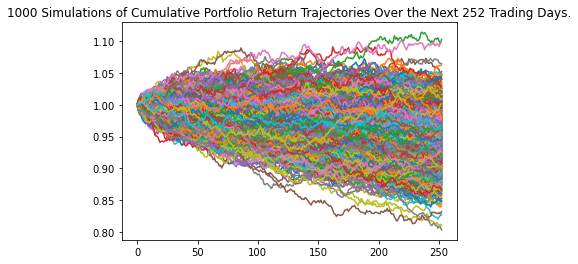

In [48]:
# Plot simulation of visual outcomes for BND ETF
bnd_wght_line_plot = MC_bnd.plot_simulation()

# Save the plot for future use
bnd_wght_line_plot.get_figure().savefig("MC_1Yr_BND_sim_plot.png", bbox_inches="tight")

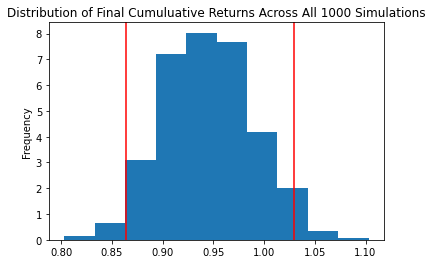

In [49]:
# Visualize the MCSimulation for a majority weight of the BND ETF in the histogram
MC_bnd_dist_plot = MC_bnd.plot_distribution()

In [50]:
# The MCSimulation generates the summary statistics with majority weight of the BND etf
# Save the summary statistics information in a variable called bnd_table 
bnd_table = MC_bnd.summarize_cumulative_return()

# Print summary statistics
print(bnd_table)

count           1000.000000
mean               0.945736
std                0.044191
min                0.803064
25%                0.912937
50%                0.945356
75%                0.975498
max                1.103112
95% CI Lower       0.864224
95% CI Upper       1.029072
Name: 252, dtype: float64


In [51]:
# We use the lower and upper `95%` confidence intervals from the summary statistics to calculate the range of 
# the probable cumulative returns for a $10,000 investment
bnd_ci_95_lower = round(bnd_table[8] * 10000,2)
bnd_ci_95_upper = round(bnd_table[9] * 10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the BND portfolio"
    f" over the next 1 year will end within in the range of"
    f" ${bnd_ci_95_lower: .2f} and ${bnd_ci_95_upper: .2f}.")

There is a 95% chance that an initial investment of $10,000 in the BND portfolio over the next 1 year will end within in the range of $ 8642.24 and $ 10290.72.


In [52]:
# Arrange the df for aggressive asset ETFs
etf_aggr_prices = etf_prices_df.drop(columns=[('QQQ', 'close'), ( 'BITO', 'close')])
etf_aggr_prices

SPY    VTWO    ARKK    RPV    BND
                            close   close   close  close  close
timestamp                                                      
2021-04-01 04:00:00+00:00  400.61  180.62  120.85  74.62  84.80
2021-04-05 04:00:00+00:00  406.36  181.65  121.64  74.99  84.67
2021-04-06 04:00:00+00:00  406.12  180.99  123.83  75.03  84.97
2021-04-07 04:00:00+00:00  406.59  178.25  120.82  75.00  84.87
2021-04-08 04:00:00+00:00  408.52  179.77  124.14  74.49  85.06
...                           ...     ...     ...    ...    ...
2022-03-25 04:00:00+00:00  452.69   83.20   64.51  86.99  78.72
2022-03-28 04:00:00+00:00  455.84   83.19   67.06  86.41  78.95
2022-03-29 04:00:00+00:00  461.53   85.43   71.39  87.10  79.30
2022-03-30 04:00:00+00:00  458.79   83.79   68.68  86.90  79.48
2022-03-31 04:00:00+00:00  452.11   82.85   66.29  85.65  79.54

[253 rows x 5 columns]

### Step 6: Create a 6th instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .05, .80, .05, .05]` to represents a portfolio of companies that are poised to profit from “disruptive innovation” like artificial intelligence, DNA technologies, energy innovation, automation, financial technology and the increased use in cloud computing stks ARK Innovation (ARKK) ETF .

In [53]:
# Configure a MCSimulation to forecast 1 year of cumulative returns
MC_arkk = MCSimulation(
    portfolio_data = etf_aggr_prices,
    weights = [.05, .05, .80, .05, .80],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_arkk.portfolio_data.head()  

SPY                 VTWO                 ARKK  \
                            close daily_return   close daily_return   close   
timestamp                                                                     
2021-04-01 04:00:00+00:00  400.61          NaN  180.62          NaN  120.85   
2021-04-05 04:00:00+00:00  406.36     0.014353  181.65     0.005703  121.64   
2021-04-06 04:00:00+00:00  406.12    -0.000591  180.99    -0.003633  123.83   
2021-04-07 04:00:00+00:00  406.59     0.001157  178.25    -0.015139  120.82   
2021-04-08 04:00:00+00:00  408.52     0.004747  179.77     0.008527  124.14   

                                          RPV                 BND               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2021-04-01 04:00:00+00:00          NaN  74.62          NaN  84.80          NaN  
2021-04-05 04:00:00+00:00     0.006537  74.99     0.004958  84.67    -0.001533  
2021-04-06 04:00:00+00:00     0.018004  75.03     0.000533  84.97     0.003543  
2021-04-07 04:00:00+00:00    -0.024308  75.00    -0.000400  84.87    -0.001177  
2021-04-08 04:00:00+00:00     0.027479  74.49    -0.006800  85.06     0.002239

In [54]:
# This MC simulation to forecast 1 years cumulative returns with 80% ARKK etf
MC_arkk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.979612  0.991450  1.018102  0.979510  1.036817  1.007738  0.988009   
2    0.983828  0.952510  0.988962  0.987340  1.016251  1.016452  0.993007   
3    0.994462  0.941144  0.978465  0.971104  1.025634  1.051581  1.021094   
4    0.995137  0.927651  0.982879  0.951452  1.014215  1.008176  1.008854   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.542301  1.252308  0.737977  0.403075  0.422965  0.784280  0.572533   
249  0.521145  1.309414  0.729540  0.401115  0.411631  0.772022  0.588356   
250  0.502130  1.316055  0.745615  0.398897  0.406526  0.767351  0.557855   
251  0.505607  1.278278  0.735087  0.397626  0.388383  0.753887  0.550819   
252  0.510315  1.240413  0.712934  0.409005  0.370476  0.768900  0.513243   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.007753  1.009840  1.030884  ...  1.003072  1.005065  0.999273   
2    0.979602  0.955726  1.020122  ...  0.999165  0.975633  0.992321   
3    1.016890  0.967068  1.031022  ...  0.969332  0.956684  1.034224   
4    1.040317  0.979817  1.030058  ...  0.955826  0.913076  1.007337   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.643252  0.491961  0.646300  ...  1.568821  0.661676  0.469780   
249  1.636912  0.498065  0.635359  ...  1.535645  0.666672  0.458016   
250  1.608917  0.512427  0.640522  ...  1.536924  0.697228  0.454278   
251  1.552023  0.500146  0.650659  ...  1.587951  0.694971  0.434975   
252  1.565708  0.507149  0.660327  ...  1.584772  0.683626  0.437186   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.973443  0.993840  0.977358  1.042963  1.014865  0.996181  1.003393  
2    0.984445  1.003154  0.961986  1.057644  1.060054  0.946166  0.975148  
3    0.960006  0.969367  0.977260  1.032033  1.056529  0.950194  1.008089  
4    0.942041  0.948639  0.980781  1.037213  1.043270  0.949165  1.005854  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.368081  0.443670  0.432559  1.193260  0.325401  0.495528  0.677758  
249  0.372014  0.448278  0.441868  1.177752  0.320737  0.491594  0.661196  
250  0.378183  0.455056  0.442130  1.186839  0.338960  0.486932  0.660933  
251  0.391162  0.442192  0.467159  1.191682  0.326733  0.498374  0.683667  
252  0.388497  0.431064  0.456216  1.157452  0.332858  0.487743  0.673362  

[253 rows x 1000 columns]

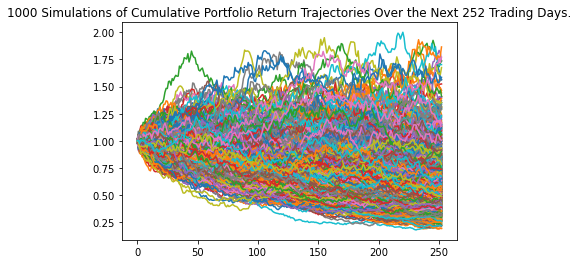

In [55]:
# Plot simulation outcomes
arkk_wght_line_plot = MC_arkk.plot_simulation()

# Save the plot for future use
arkk_wght_line_plot.get_figure().savefig("MC_1Yr_ARKK_sim_plot.png", bbox_inches="tight")

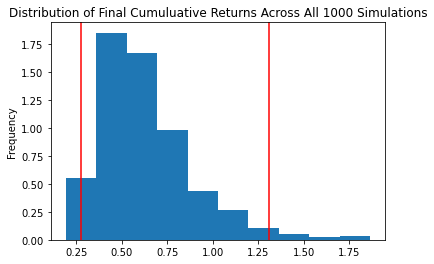

In [56]:
# Visualize the MC simulation for a majority weight in ARKK by creating a histogram
MC_arkk_dist_plot = MC_arkk.plot_distribution()

In [57]:
# Generate the summary statistics for the MC simulation with majority weight in ARKK
# Save the summary statistics information in a variable called arkk_table 
arkk_table = MC_arkk.summarize_cumulative_return()

# Print summary statistics
print(arkk_table)

count           1000.000000
mean               0.631653
std                0.256921
min                0.193194
25%                0.453751
50%                0.571380
75%                0.750698
max                1.864822
95% CI Lower       0.277202
95% CI Upper       1.309854
Name: 252, dtype: float64


In [58]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
arkk_ci_95_lower = round(arkk_table[8] * 10000,2)
arkk_ci_95_upper = round(arkk_table[9] * 10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the ARKK portfolio"
    f" over the next 1 year will end within in the range of"
    f" ${arkk_ci_95_lower: .2f} and ${arkk_ci_95_upper: .2f}.") 

There is a 95% chance that an initial investment of $10,000 in the ARKK portfolio over the next 1 year will end within in the range of $ 2772.02 and $ 13098.54.


In [59]:
# # Arrange the df for a crypto ETF BITO
etf_crypto_prices = etf_prices_df.drop(columns=[('QQQ', 'close'), ( 'ARKK', 'close')])
etf_crypto_prices

SPY    VTWO    RPV    BND   BITO
                            close   close  close  close  close
timestamp                                                     
2021-04-01 04:00:00+00:00  400.61  180.62  74.62  84.80    NaN
2021-04-05 04:00:00+00:00  406.36  181.65  74.99  84.67    NaN
2021-04-06 04:00:00+00:00  406.12  180.99  75.03  84.97    NaN
2021-04-07 04:00:00+00:00  406.59  178.25  75.00  84.87    NaN
2021-04-08 04:00:00+00:00  408.52  179.77  74.49  85.06    NaN
...                           ...     ...    ...    ...    ...
2022-03-25 04:00:00+00:00  452.69   83.20  86.99  78.72  27.94
2022-03-28 04:00:00+00:00  455.84   83.19  86.41  78.95  30.13
2022-03-29 04:00:00+00:00  461.53   85.43  87.10  79.30  29.98
2022-03-30 04:00:00+00:00  458.79   83.79  86.90  79.48  29.50
2022-03-31 04:00:00+00:00  452.11   82.85  85.65  79.54  28.56

[253 rows x 5 columns]

### Step 7: Create a 7th instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.05, .05, .05, .05, .80]` to represent a cryptocurrency portfolio that provides exposure to bitcoin returns in an ETF wrapper in the Bitcoin Strategy ETF.  (The fund will invest in cash settled, front-month bitcoin futures, traded on commodity exchanges.) 

In [60]:
# Configure a Monte Carlo simulation to forecast 1 years cumulative returns
MC_bito = MCSimulation(
    portfolio_data = etf_crypto_prices,
    weights = [.05, .05, .05, .05, .80],
    num_simulation = 1000,
    num_trading_days = 252*1)

# Printing the first five rows of the simulation input data
MC_bito.portfolio_data.head()  

SPY                 VTWO                 RPV  \
                            close daily_return   close daily_return  close   
timestamp                                                                    
2021-04-01 04:00:00+00:00  400.61          NaN  180.62          NaN  74.62   
2021-04-05 04:00:00+00:00  406.36     0.014353  181.65     0.005703  74.99   
2021-04-06 04:00:00+00:00  406.12    -0.000591  180.99    -0.003633  75.03   
2021-04-07 04:00:00+00:00  406.59     0.001157  178.25    -0.015139  75.00   
2021-04-08 04:00:00+00:00  408.52     0.004747  179.77     0.008527  74.49   

                                          BND               BITO               
                          daily_return  close daily_return close daily_return  
timestamp                                                                      
2021-04-01 04:00:00+00:00          NaN  84.80          NaN   NaN          NaN  
2021-04-05 04:00:00+00:00     0.004958  84.67    -0.001533   NaN          NaN  
2021-04-06 04:00:00+00:00     0.000533  84.97     0.003543   NaN          NaN  
2021-04-07 04:00:00+00:00    -0.000400  84.87    -0.001177   NaN          NaN  
2021-04-08 04:00:00+00:00    -0.006800  85.06     0.002239   NaN          NaN

In [61]:
# This MC simulation to forecast 1 years cumulative returns with 80% BITO etf
MC_bito.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gotha\Onedrive\Desktop\Mod-Challenges\Mod8P1-Chllg\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.972726  0.984154  1.087903  0.959727  1.008382  1.004167  0.977844   
2    0.959309  1.014546  1.157934  0.965582  0.987253  1.008375  0.968038   
3    0.965881  1.012632  1.184656  0.939967  0.967348  0.996445  0.930603   
4    0.902060  0.971644  1.171539  0.916139  0.986576  1.035353  0.939480   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.282165  0.180347  0.799069  0.875325  0.439036  0.806480  0.910627   
249  0.279735  0.183774  0.820476  0.888997  0.444536  0.808171  0.853591   
250  0.283475  0.189350  0.824545  0.891035  0.450678  0.758514  0.861598   
251  0.287182  0.181397  0.808927  0.900192  0.444937  0.713655  0.862482   
252  0.278707  0.181693  0.838693  0.853232  0.470647  0.722363  0.839423   

          7         8         9    ...       990       991       992  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.964310  0.934848  1.001990  ...  0.981954  0.981881  1.042221   
2    0.984794  0.992189  0.987838  ...  0.929116  0.941780  1.059933   
3    1.021265  1.011900  1.004062  ...  0.950185  0.947847  1.088731   
4    1.021030  1.080463  1.072918  ...  0.925944  0.953439  1.071380   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.395722  1.091202  0.454147  ...  0.427427  0.815443  0.528435   
249  0.385538  1.043545  0.480107  ...  0.418198  0.830469  0.543347   
250  0.383762  1.099786  0.502095  ...  0.413197  0.808886  0.539562   
251  0.374004  1.125262  0.512563  ...  0.424845  0.809025  0.548441   
252  0.360045  1.071711  0.528325  ...  0.449557  0.809432  0.564180   

          993       994       995       996       997       998       999  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.966169  1.017218  0.987396  0.963482  0.980140  0.922174  0.944655  
2    0.987820  0.919528  0.999176  1.008582  1.006280  0.953457  0.997722  
3    0.959512  0.932622  1.004621  1.004896  1.027935  0.929372  0.993533  
4    0.958169  0.945679  1.011815  1.036453  1.023329  0.901807  1.003179  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.552030  0.236467  0.336913  0.718454  1.375382  0.692630  0.626430  
249  0.543762  0.243506  0.355268  0.688300  1.392218  0.663216  0.611733  
250  0.563892  0.239057  0.339218  0.712789  1.386206  0.674787  0.621832  
251  0.553680  0.231899  0.329628  0.717201  1.446706  0.683591  0.631027  
252  0.563712  0.232694  0.331429  0.717684  1.361492  0.674148  0.590477  

[253 rows x 1000 columns]

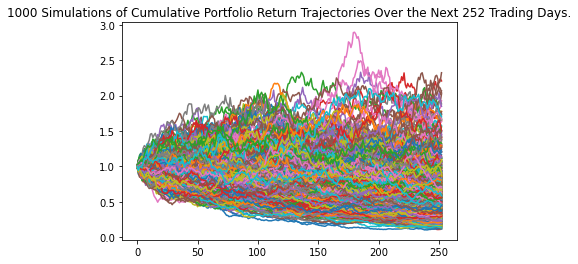

In [62]:
# Plot simulation outcomes
bito_wght_line_plot = MC_bito.plot_simulation()

# Save the plot for future use
bito_wght_line_plot.get_figure().savefig("MC_1Yr_BITO_sim_plot.png", bbox_inches="tight")

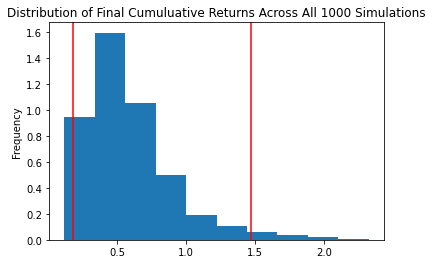

In [63]:
# Visualize the MC simulation for a majority weight in ARKK by creating a histogram
MC_bito_dist_plot = MC_bito.plot_distribution()

In [64]:
# Generate the summary statistics for the MC simulation with majority weight in BITO
# Save the summary statistics information in a variable called bito_table 
bito_table = MC_bito.summarize_cumulative_return()

# Print summary statistics
print(bito_table)

count           1000.000000
mean               0.586846
std                0.327286
min                0.117494
25%                0.357979
50%                0.507834
75%                0.726179
max                2.322553
95% CI Lower       0.181690
95% CI Upper       1.472348
Name: 252, dtype: float64


In [65]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
bito_ci_95_lower = round(bito_table[8] * 10000,2)
bito_ci_95_upper = round(bito_table[9] * 10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
    f" over the next 1 years will end within in the range of"
     f" ${bito_ci_95_lower: .2f} and ${bito_ci_95_upper: .2f}.") 

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 1 years will end within in the range of $ 1816.90 and $ 14723.48.


In [66]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
even_weight_cumltv_rtns = (1 + even_weight_table).cumprod()

even_weight_cumltv_rtns.tail() 

50%              13039.506758
75%              26707.314773
max              67081.856380
95% CI Lower    116706.893864
95% CI Upper    260658.480433
Name: 252, dtype: float64